# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

#rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
#rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

# constant circuits from experiment data
with open('rb_circs_unitary_name.pk', 'rb') as fp:
    rb_circs_tuple = pickle.load(fp)    
rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, rb_cnotdihedral_interleaved_X_circs = rb_circs_tuple

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

         ┌──────────┐     ┌───┐ ░  ░ ┌───┐     ┌────────────┐┌─┐   
qr_0: |0>┤ U1(pi/4) ├──■──┤ X ├─░──░─┤ X ├──■──┤ U1(5.4978) ├┤M├───
         └──┬───┬───┘┌─┴─┐└─┬─┘ ░  ░ └─┬─┘┌─┴─┐└───┬───┬────┘└╥┘┌─┐
qr_1: |0>───┤ X ├────┤ X ├──■───░──░───■──┤ X ├────┤ X ├──────╫─┤M├
            └───┘    └───┘      ░  ░      └───┘    └───┘      ║ └╥┘
 cr_0: 0 ═════════════════════════════════════════════════════╩══╬═
                                                                 ║ 
 cr_1: 0 ════════════════════════════════════════════════════════╩═
                                                                   


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

         ┌──────────┐     ┌───┐ ░ ┌──────────┐ ░  ░ ┌────────────┐┌───┐»
qr_0: |0>┤ U1(pi/4) ├──■──┤ X ├─░─┤0         ├─░──░─┤ U1(5.4978) ├┤ X ├»
         └──┬───┬───┘┌─┴─┐└─┬─┘ ░ │  unitary │ ░  ░ └────────────┘└─┬─┘»
qr_1: |0>───┤ X ├────┤ X ├──■───░─┤1         ├─░──░─────────────────■──»
            └───┘    └───┘      ░ └──────────┘ ░  ░                    »
 cr_0: 0 ══════════════════════════════════════════════════════════════»
                                                                       »
 cr_1: 0 ══════════════════════════════════════════════════════════════»
                                                                       »
«                              ┌─┐   
«qr_0: ────────────────■───────┤M├───
«      ┌────────────┐┌─┴─┐┌───┐└╥┘┌─┐
«qr_1: ┤ U1(5.4978) ├┤ X ├┤ X ├─╫─┤M├
«      └────────────┘└───┘└───┘ ║ └╥┘
«cr_0: ═════════════════════════╩══╬═
«                                  ║ 
«cr_1: ════════════════════════════╩═
«                                    


In [6]:
#print (rb_cnotdihedral_interleaved_Z_circs[0][0].qasm())

In [7]:
print (rb_cnotdihedral_X_circs[0][0])

         ┌───┐ ░ ┌──────────┐     ┌───┐ ░  ░ ┌───┐     ┌────────────┐ ░ ┌───┐»
qr_0: |0>┤ H ├─░─┤ U1(pi/4) ├──■──┤ X ├─░──░─┤ X ├──■──┤ U1(5.4978) ├─░─┤ H ├»
         ├───┤ ░ └──┬───┬───┘┌─┴─┐└─┬─┘ ░  ░ └─┬─┘┌─┴─┐└───┬───┬────┘ ░ ├───┤»
qr_1: |0>┤ H ├─░────┤ X ├────┤ X ├──■───░──░───■──┤ X ├────┤ X ├──────░─┤ H ├»
         └───┘ ░    └───┘    └───┘      ░  ░      └───┘    └───┘      ░ └───┘»
 cr_0: 0 ════════════════════════════════════════════════════════════════════»
                                                                             »
 cr_1: 0 ════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌─┐   
«qr_0: ┤M├───
«      └╥┘┌─┐
«qr_1: ─╫─┤M├
«       ║ └╥┘
«cr_0: ═╩══╬═
«          ║ 
«cr_1: ════╩═
«            


In [8]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

         ┌───┐ ░ ┌──────────┐     ┌───┐ ░ ┌──────────┐ ░  ░ ┌────────────┐┌───┐»
qr_0: |0>┤ H ├─░─┤ U1(pi/4) ├──■──┤ X ├─░─┤0         ├─░──░─┤ U1(5.4978) ├┤ X ├»
         ├───┤ ░ └──┬───┬───┘┌─┴─┐└─┬─┘ ░ │  unitary │ ░  ░ └────────────┘└─┬─┘»
qr_1: |0>┤ H ├─░────┤ X ├────┤ X ├──■───░─┤1         ├─░──░─────────────────■──»
         └───┘ ░    └───┘    └───┘      ░ └──────────┘ ░  ░                    »
 cr_0: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_1: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
«                           ░  ┌───┐     ┌─┐   
«qr_0: ────────────────■────░──┤ H ├─────┤M├───
«      ┌────────────┐┌─┴─┐┌───┐└─░─┘┌───┐└╥┘┌─┐
«qr_1: ┤ U1(5.4978) ├┤ X ├┤ X ├──░──┤ H ├─╫─┤M├
«      └────────────┘└───┘└───┘  ░  └───┘ ║ └╥┘
«cr_0: ════════════════════════

### Add a depolarize noise to the CS gate

In [9]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Q = 0.0005
p2Q = 0.011/0.75

# Construct the error
cs_error = errors.depolarizing_error(p2Q, 2)
print ("Depolarizing errors on u2,u3,cs,cx gates respectively:", p1Q, 2*p1Q, p2Q, p2Q)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

Depolarizing errors on u2,u3,cs,cx gates respectively: 0.0005 0.001 0.014666666666666666 0.014666666666666666
NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['cs', 'cx', 'u3', 'u2']
  All-qubits errors: ['u2', 'u3', 'cx', 'cs']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


### Execute the RB sequences

In [10]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral X Circuits


In [11]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [12]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Z Circuits


In [13]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [14]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [15]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.68294772, 0.97112663, 0.27248314]), 'params_err': array([0.03906793, 0.00280454, 0.01423052]), 'epc': 0.021655028187500647, 'epc_err': 0.002165944996743967}


In [16]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.72658768, 0.97163741, 0.2532354 ]), 'params_err': array([0.01739221, 0.00150702, 0.00618678]), 'epc': 0.02127194554448847, 'epc_err': 0.0011632579329010802}


In [17]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [18]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.73040768, 0.95596677, 0.26766757]), 'params_err': array([0.00373201, 0.00135852, 0.00264505]), 'epc': 0.03302492153605352, 'epc_err': 0.0010658211389920763}


In [19]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.75210764, 0.95540937, 0.24910697]), 'params_err': array([0.00856814, 0.0021871 , 0.00524103]), 'epc': 0.03344297443057084, 'epc_err': 0.0017168779537163053}


In [20]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [21]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9715352505692121, 'alpha_err': 0.001368652788349495, 'epg_est': 0.021348562073090938, 'epg_est_err': 0.0010565644331080237}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9555208481977768, 'alpha_err': 0.001853260300290242, 'epg_est': 0.03335936385166738, 'epg_est_err': 0.0014546466755165828}


In [22]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))
print('RB fidelity = %.5f' % (1 - r_est))

Estimated gate error: 0.012363 (0.001482)
RB fidelity = 0.98764


### Plot the results

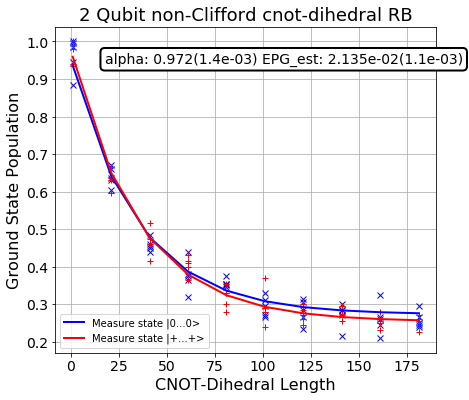

In [23]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

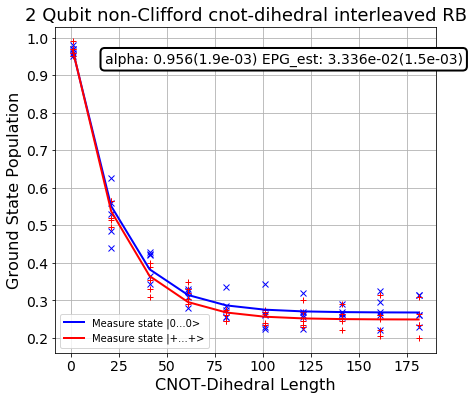

In [24]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()